# Digit Classification
cf. https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [9]:
from sklearn import datasets, svm, neighbors, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
digits = datasets.load_digits()

In [11]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
digits.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

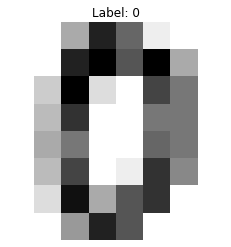

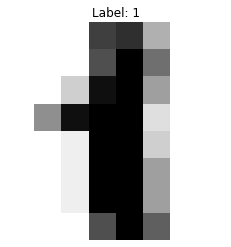

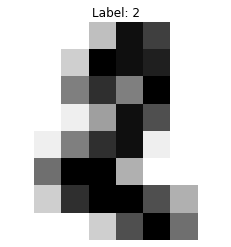

In [13]:
for i in range(3):
  plt.imshow(digits.data[i].reshape(8, 8), cmap=plt.cm.gray_r)
  plt.title("Label: %i" % digits.target[i])
  plt.axis('off')
  plt.show()

In [14]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

## 5 or not 5?
### Adjust the Target Variable


In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [18]:
y_train[:6], y_train_5[:6]

(array([0, 1, 2, 3, 4, 5]), array([False, False, False, False, False,  True]))

### Train and Evaluate a Linear Model

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=100, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=100, random_state=42)

In [20]:
sgd_clf.predict([data[0]])

array([False])

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.97666667, 0.97324415, 0.98996656])

### Train and Evaluate a Trivial Baseline

In [23]:
from sklearn.base import BaseEstimator
import numpy as np
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [24]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.89333333, 0.90301003, 0.89966555])

### Confusion Matrix

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)